In [1]:
exec(open('libraries.py').read())
%matplotlib inline

In [2]:
cliente_tabla = pd.read_csv('../data/cliente_tabla.csv')
producto_tabla = pd.read_csv('../data/producto_tabla.csv')
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')
town_state = pd.read_csv('../data/town_state.csv')
client_info = pd.read_csv('../data/Derived/client_info.csv')
pivot_test_train = pd.read_csv('../data/Derived/pivot_test_train.csv')

OSError: File b'data/Derived/client_info.csv' does not exist

In [3]:
print('Shape of training dataset: %s' %str(train.shape))
print('Different weeks in training dataset %s' %str(np.unique(train['Semana'])))
train.sample(5)

Shape of training dataset: (74180464, 11)
Different weeks in training dataset [3 4 5 6 7 8 9]


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
66598986,9,1315,1,5056,357381,43039,3,25.14,0,0.0,3
67949617,9,1445,1,1154,157241,43202,2,16.76,0,0.0,2
18208561,4,1954,1,2846,4354832,30532,5,38.90,0,0.0,5
27472543,5,1614,1,1026,289208,46772,5,44.60,0,0.0,5
28369742,5,1698,1,1224,2006574,41938,4,39.64,0,0.0,4


In [4]:
print('Shape of test dataset: %s' %str(test.shape))
print('Different weeks in test dataset %s' %str(np.unique(test['Semana'])))
print('Percent observations to test on week 10 %s' %str(np.round(np.sum(test['Semana']==10)*100/float(len(test)))))
print('Percent observations to test on week 11 %s' %str(np.round(np.sum(test['Semana']==11)*100/float(len(test)))))
print('These match with the percent of test observations that will be used for leaderbord evaluation \
        (51 percent) and for private evaulation (49 percent) as explained on the leaderbord page')
test.sample(5)

Shape of test dataset: (6999251, 7)
Different weeks in test dataset [10 11]
Percent observations to test on week 10 51.0
Percent observations to test on week 11 49.0
These match with the percent of test observations that will be used for leaderbord evaluation         (51 percent) and for private evaulation (49 percent) as explained on the leaderbord page


,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
4080418,4080418,10,1221,1,4428,4356582,43064
6821069,6821069,11,22560,1,1220,4558827,43196
4303078,4303078,10,1631,1,2101,281640,40930
3651119,3651119,11,22560,1,1073,2170071,43006
3748106,3748106,11,22362,1,1230,1797375,1182


In [5]:
cliente_tabla.sample(5)

,Cliente_ID,NombreCliente
437575,1742954,ABARROTES IVON
154831,391492,JOSE SANTOS NAVA
287444,942484,LUZ ELENA
675346,4294371,NO IDENTIFICADO
803986,4592086,NO IDENTIFICADO


In [6]:
producto_tabla.sample(5)

,Producto_ID,NombreProducto
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
1120,34403,Tartina Zarzamora 2p 26g TR 34403
2584,49988,Tostado Blanco 180g MTA WON 49988
1739,36907,Tostado Integral 250g TNB BIM 36907
1906,37612,Atun en Aceite 140g NAI 37612


In [7]:
town_state.sample(5)

,Agencia_ID,Town,State
534,4082,2493 MITRAS,NUEVO LEÓN
16,1129,2011 AG. SAN ANTONIO,"MÉXICO, D.F."
432,2218,2381 CANCUN_BM,QUINTANA ROO
433,2220,2395 PLAYA DEL CARMEN,QUINTANA ROO
382,2040,2181 ZIHUATANEJO,GUERRERO


# Kaggle description
### Maximize sales and minimize returns of bakery goods
Planning a celebration is a balancing act of preparing just enough food to go around without being stuck eating the same leftovers for the next week. The key is anticipating how many guests will come. Grupo Bimbo must weigh similar considerations as it strives to meet daily consumer demand for fresh bakery products on the shelves of over 1 million stores along its 45,000 routes across Mexico.<br><br>
Currently, daily inventory calculations are performed by direct delivery sales employees who must single-handedly predict the forces of supply, demand, and hunger based on their personal experiences with each store. With some breads carrying a one week shelf life, the acceptable margin for error is small.<br><br>
In this competition, Grupo Bimbo invites Kagglers to develop a model to accurately forecast inventory demand based on historical sales data. Doing so will make sure consumers of its over 100 bakery products aren’t staring at empty shelves, while also reducing the amount spent on refunds to store owners with surplus product unfit for sale.<br>

# Kaggle data info

In this competition, you will forecast the demand of a product for a given week, at a particular store. The dataset you are given consists of 9 weeks of sales transactions in Mexico. Every week, there are delivery trucks that deliver products to the vendors. Each transaction consists of sales and returns. Returns are the products that are unsold and expired. The demand for a product in a certain week is defined as the sales this week subtracted by the return next week. <br>
The train and test dataset are split based on time, as well as the public and private leaderboard dataset split.<br>

### Things to note:
There may be products in the test set that don't exist in the train set. This is the expected behavior of inventory data, since there are new products being sold all the time. Your model should be able to accommodate this.<br><br>
There are duplicate Cliente_ID's in cliente_tabla, which means one Cliente_ID may have multiple NombreCliente that are very similar. This is due to the NombreCliente being noisy and not standardized in the raw data, so it is up to you to decide how to clean up and use this information. <br><br>
The adjusted demand (Demanda_uni_equil) is always >= 0 since demand should be either 0 or a positive value. The reason that Venta_uni_hoy - Dev_uni_proxima sometimes has negative values is that the returns records sometimes carry over a few weeks.<br>
### File descriptions<br>
- train.csv — the training set<br>
- test.csv — the test set<br>
- sample_submission.csv — a sample submission file in the correct format<br>
- cliente_tabla.csv — client names (can be joined with train/test on Cliente_ID)<br>
- producto_tabla.csv — product names (can be joined with train/test on Producto_ID)<br>
- town_state.csv — town and state (can be joined with train/test on Agencia_ID)<br>

### Data fields<br>
- Semana — Week number (From Thursday to Wednesday)<br>
- Agencia_ID — Sales Depot ID<br>
- Canal_ID — Sales Channel ID<br>
- Ruta_SAK — Route ID (Several routes = Sales Depot)<br>
- Cliente_ID — Client ID<br>
- NombreCliente — Client name<br>
- Producto_ID — Product ID<br>
- NombreProducto — Product Name<br>
- Venta_uni_hoy — Sales unit this week (integer)<br>
- Venta_hoy — Sales this week (unit: pesos)<br>
- Dev_uni_proxima — Returns unit next week (integer)<br>
- Dev_proxima — Returns next week (unit: pesos)<br>
- Demanda_uni_equil — Adjusted Demand (integer) (This is the target you will predict)<br>

# Kaggle evaluation info
The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as <br>

For every row in the dataset, submission files should contain two columns: id and Demanda_uni_equi.  The id corresponds to the column of that id in the test.csv. The file should contain a header and have the following format:

In [8]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,Demanda_uni_equil
0,0,7
1,1,7
2,2,7
3,3,7
4,4,7


# Investigate one client ID

In [9]:
print('There are %i amount of clients' %len(np.unique(train['Cliente_ID'])))

There are 880604 amount of clients


In [10]:
random_client_id = np.random.choice(np.unique(train['Cliente_ID']), size = 1)[0]
subset_random_client = train.loc[train['Cliente_ID'] == random_client_id, :]
subset_random_client = pd.merge(subset_random_client, 
                                cliente_tabla.loc[cliente_tabla['Cliente_ID'] == random_client_id, :],
                               left_on='Cliente_ID', right_on='Cliente_ID', how='left')
print('Client names: %s' %np.unique(subset_random_client['NombreCliente']))
print('How many different products does he need: %i' %len(np.unique(subset_random_client['Producto_ID'])))
subset_random_client.sample(5)

Client names: ['EL RETOÑO']
How many different products does he need: 41


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreCliente
16,4,1955,1,1114,575075,1240,3,25.14,0,0.0,3,EL RETOÑO
68,7,1955,1,1114,575075,48417,6,27.48,0,0.0,6,EL RETOÑO
75,8,1955,1,1114,575075,1240,3,25.14,0,0.0,3,EL RETOÑO
25,4,1955,1,4137,575075,43064,1,8.15,0,0.0,1,EL RETOÑO
14,3,1955,1,4137,575075,43084,1,8.15,0,0.0,1,EL RETOÑO


Important: during the last week, not all the products are delivered.

In [11]:
print('Number of unique products of this store %i' %len(np.unique(subset_random_client['Producto_ID'])))
last_week = subset_random_client.loc[subset_random_client['Semana'] == 9]
print('Number of lines in last week DF %i' %len(last_week))
print('Number of unique products last week DF %i' %len(np.unique(last_week['Producto_ID'])))

Number of unique products of this store 41
Number of lines in last week DF 14
Number of unique products last week DF 14


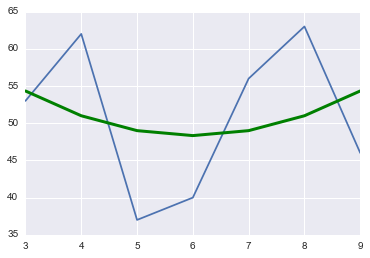

In [12]:
from scipy.interpolate import UnivariateSpline
groupby_week = subset_random_client.groupby('Semana')['Demanda_uni_equil'].aggregate('sum')
plt.plot(groupby_week)

spl = UnivariateSpline(groupby_week.index.values, groupby_week.values, k=2, s=10000)
plt.plot(groupby_week.index.values, spl(groupby_week.index.values), 'g', lw=3)

### There seems to be clients in the test data that were not in the training data

In [13]:
train_clients = np.unique(train['Cliente_ID'])
test_isin = test['Cliente_ID'].isin(train_clients)
sum(test_isin)/len(test_isin)

0.99570611198255354

# Asses a product

In [32]:
print('There are %i amount of products' %len(np.unique(train['Producto_ID'])))

There are 1799 amount of products


In [ ]:
training_products = np.unique(train['Producto_ID'])
test_10_products = np.unique(test.loc[test['Semana']==10, 'Producto_ID'])
test_11_products = np.unique(test.loc[test['Semana']==11, 'Producto_ID'])
print('Percent of products in test 10 and test 11 that are seen in training data')
print(sum(pd.Series(test_10_products).isin(training_products))/len(test_10_products))
print(sum(pd.Series(test_11_products).isin(training_products))/len(test_11_products))

In [30]:
random_product_id = np.random.choice(np.unique(train['Producto_ID']), size = 1)[0]
subset_random_product = train.loc[train['Producto_ID'] == random_product_id, :]
groupby_week = pd.DataFrame(subset_random_product.groupby('Semana')['Demanda_uni_equil'].aggregate('sum'))
plt.plot(groupby_week)
groupby_week['intercept'] = 0
X = np.zeros(shape = (len(groupby_week),3))
X[:,0] = 1
X[:,1] = groupby_week.index.values
X[:,2] = np.square(groupby_week.index.values)
y = groupby_week['Demanda_uni_equil'].values 
lin_model = linear_model.RidgeCV()
lin_model.fit(X = X, y = y)
plt.plot(groupby_week.index.values, lin_model.predict(X), 'g', lw=3)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
16553665,4,1597,2,1553,29613,35439,34,680.0,0,0.00,34
73821696,9,4064,2,1528,146870,35439,0,0.0,68,1292.68,0
68825007,9,1586,2,1570,26932,35439,102,2040.0,0,0.00,102
3935980,3,1359,2,1605,35518,35439,68,1360.0,0,0.00,68
16479219,4,1578,2,1563,26204,35439,34,680.0,0,0.00,34


# Asses product size

In [ ]:
groupby_product = train.groupby('Producto_ID')['Cliente_ID']
def return_number_of_unique_values(arr):
    return len(np.unique(arr))
groupby_product = groupby_product.aggregate(return_number_of_unique_values)
groupby_product.hist()
plt.title('At how many stores is a product delivered')

# Asses store size

In [39]:
print('There are %i amount of stores' %len(np.unique(train['Cliente_ID'])))

There are 880604 amount of stores


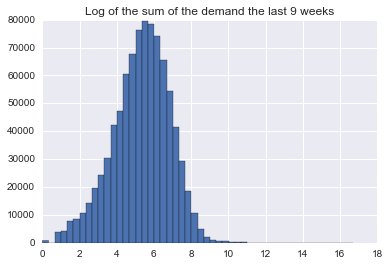

In [45]:
grouped_by_client = train.loc[:, ['Cliente_ID', 'Demanda_uni_equil']].groupby('Cliente_ID')
grouped_by_client = grouped_by_client.aggregate('sum')
grouped_by_client['log_Demanda_uni_equil'] = np.log(grouped_by_client['Demanda_uni_equil'] + 1)
grouped_by_client['log_Demanda_uni_equil'].hist(bins = 50)
plt.title('Log of the sum of the demand the last 9 weeks')
grouped_by_client['rel_store_size'] = np.argsort(grouped_by_client['log_Demanda_uni_equil'].values)/len(grouped_by_client)
train = pd.merge(train, grouped_by_client[['rel_store_size']], how = 'left', 
                left_on = 'Cliente_ID', right_index = True)

# Assess Agencia_ID and Route_SAK

Are the two a good geo approximation? This really unclear.

From the Kaggle forum:

<i>Validated - One depot serves multiple routes - One route can be served by multiple depots - One route delivers to multiple retailers - One retailer can be delivered-to by multiple routes

To be corroborated - There are depots that specialize in some products or brands - Only some routes deliver products from certain brands</i>


Total agencies: 552
Number of agencies with only one client: 45
Number of agencies with only two clients: 17
Number of agencies with only two clients: 1


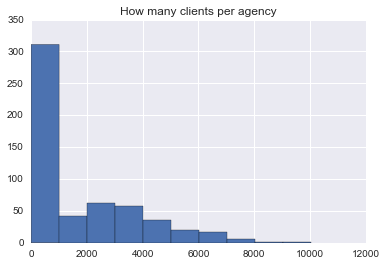

In [123]:
agencies = train[['Agencia_ID', 'Cliente_ID']].groupby('Agencia_ID')['Cliente_ID'].nunique()
agencies.hist()
plt.title('How many clients per agency')
print('Total agencies: %i' %len(np.unique(train['Agencia_ID'])))
print('Number of agencies with only one client: %i' %sum(agencies==1))
print('Number of agencies with only two clients: %i' %sum(agencies==2))
print('Number of agencies with only two clients: %i' %sum(agencies==3))

In [51]:
random_agency_with_1_client = np.random.choice(agencies.loc[agencies == 1].index)
print('We are checking agency: %i ' %random_agency_with_1_client)
train.loc[train['Agencia_ID'] == random_agency_with_1_client, :].head()

We are checking agency: 1977 


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,rel_store_size_x,rel_store_size_y
7466509,3,1977,5,3001,653378,1240,149,1655.39,17,188.87,132,759215,0.862153
7466510,3,1977,5,3001,653378,1250,368,3407.68,29,268.54,339,759215,0.862153
7466511,3,1977,5,3001,653378,1309,42,388.92,5,46.30,37,759215,0.862153
7466512,3,1977,5,3001,653378,4280,431,3991.06,144,1333.44,287,759215,0.862153
7466513,3,1977,5,3001,653378,5200,1249,10766.38,85,732.70,1164,759215,0.862153


Percent of clients with more than one route: 0.671613


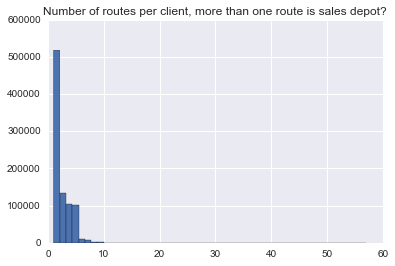

In [82]:
routes_per_client.hist(bins=50)
plt.title('Number of routes per client, more than one route is sales depot?')
print('Percent of clients with more than one route: %f' %(sum(routes_per_client>1)/len(routes_per_client)))

### Lets check client 65  with 3 routes

Is this a sales depot?

In [112]:
#client_65 = train.loc[train['Cliente_ID']==65, :]
print('Unique routes of client 65: %s' %str(np.unique(client_65['Ruta_SAK'])))
print('Agency IDs of client 65 = %s' %str(np.unique(client_65['Agencia_ID'])))
clients_on_routes_of_client_65 = train.loc[train['Ruta_SAK'].isin(np.unique(client_65['Ruta_SAK'])),:]
print('Unique clients on the routes of client 60: %s' %str(np.unique(clients_on_routes_of_client_65['Cliente_ID'])))
print('Unique agencies on the routes of client 60: %s' %str(np.unique(clients_on_routes_of_client_65['Agencia_ID'])))

Unique routes of client 65: [7250 7333 9033]
Agency IDs of client 65 = [2061 2655]
Unique clients on the routes of client 60: [     65   38525 4221873]
Unique agencies on the routes of client 60: [1379 1524 2061 2655]


In [104]:
clients_on_route_7250 = train.loc[train['Ruta_SAK']==7250, :]
print('Clients on route 7250: %s' %str(np.unique(clients_on_route_7250['Cliente_ID'])))
clients_on_route_7333 = train.loc[train['Ruta_SAK']==7333, :]
print('Clients on route 7333: %s' %str(np.unique(clients_on_route_7333['Cliente_ID'])))
clients_on_route_9033 = train.loc[train['Ruta_SAK']==9033, :]
print('Clients on route 9033: %s' %str(np.unique(clients_on_route_9033['Cliente_ID'])))

Clients on route 7250: [     65 4221873]
Clients on route 7333: [65]
Clients on route 9033: [   65 38525]


In [110]:
routes_client_4221873 = train.loc[train['Cliente_ID']==4221873, :]
print('Routes client 4221873 %s' %str(np.unique(routes_client_4221873['Ruta_SAK'])))
routes_client_38525 = train.loc[train['Cliente_ID']==38525, :]
print('Routes client 38525 %s' %str(np.unique(routes_client_38525['Ruta_SAK'])))

Routes client 4221873 [1016 6601 7250]
Routes client 38525 [1547 9033]


In [120]:
clients_route_1547 = train.loc[train['Ruta_SAK']==1547, :]
print('Clients on route 1547 %s' %str(np.unique(clients_route_1547['Cliente_ID'])))

Clients on route 1547 [  38525  146832 1799952 2080101 2128232 2304201 2502307 4387344 5908375
 5965911]


In [122]:
np.unique(train.loc[train['Cliente_ID'].isin(np.unique(clients_route_1547['Cliente_ID'])), 'Ruta_SAK'])

array([1547, 2547, 6002, 6062, 8159, 8843, 9033, 9201, 9289, 9843])

In [118]:
agencies_client_38525 = train.loc[train['Cliente_ID']==38525, :]
np.unique(agencies_client_38525['Agencia_ID'])

array([1524, 1579])

### Try out new feature based on agencia id

In [21]:
one_agency = train.loc[train['Agencia_ID']==2061, :]
grouped_by_agencia_ID = one_agency.groupby(['Agencia_ID', 'Producto_ID'])
unique_clients = grouped_by_agencia_ID['Cliente_ID'].nunique()
unique_clients = pd.DataFrame(unique_clients)
unique_clients = unique_clients.rename(columns = { 'Cliente_ID': 'Unique_clients'})
one_agency_pivot = pd.pivot_table(data = one_agency, values = 'Demanda_uni_equil', 
                                  index = ['Agencia_ID', 'Producto_ID'], columns = 'Semana')
pd.merge(unique_clients, one_agency_pivot, left_index = True, right_index = True, how='left')

Unique_clients           3           4           5           6           7           8           9
Agencia_ID Producto_ID                                                                                                    
2061       1182                     42  105.166667  112.111111  109.111111  131.100000  104.357143   96.440000  137.230769
           2665                     30   54.200000   56.750000   49.083333   37.357143   68.000000   52.454545   50.384615
           4767                     42   55.368421   82.384615   91.272727  103.041667   91.827586  104.037037   90.916667
           30007                    13   55.100000   64.000000  100.428571   85.142857  121.800000  102.600000   61.800000
           30235                    13   48.000000  123.250000   44.400000   31.000000   90.000000   24.000000   22.000000
           30236                    20  100.800000  132.000000   48.833333   28.000000   68.571429   28.600000   33.600000
           30314                    30   51.000000  156.000000  123.428571  130.285714  141.941176  113.916667  250.285714
           30423                     3         NaN         NaN         NaN         NaN   54.000000   18.000000   24.000000
           30572                    16  121.153846  114.111111   87.500000   73.800000   47.000000         NaN         NaN
           30575                    15  171.000000   93.333333   78.222222   85.666667         NaN         NaN         NaN
           31184                    14   50.666667  177.142857  152.000000   75.600000   79.666667  155.800000   64.000000
           31187                     6  536.000000  525.000000  160.000000         NaN         NaN         NaN         NaN
           31194                     2   12.000000         NaN         NaN   26.000000         NaN         NaN  128.000000
           31198                    11   56.000000   96.000000  140.000000  140.000000   67.200000   28.000000   42.000000
           31310                    10   44.000000   32.000000   54.666667   48.500000   49.500000   44.000000   31.750000
           31393                    58   37.517857   40.418182   35.228070   38.200000   37.886792   38.611111   38.254545
           31467                    17   43.428571   63.833333   28.000000   42.666667   41.400000   38.666667   52.000000
           31471                    14   52.000000   87.750000   32.000000   42.333333   28.800000   33.777778   41.600000
           31473                     3  240.000000  144.000000  156.000000         NaN   72.000000   84.000000  120.000000
           31485                     1   17.000000         NaN         NaN         NaN         NaN         NaN         NaN
           31498                    15   10.625000   17.583333   17.000000   23.076923   27.200000   16.800000   42.500000
           31500                    23   12.666667   20.950000   14.923077   19.928571   20.000000   16.315789   25.894737
           31507                     5         NaN   35.000000   52.500000   35.000000         NaN   35.000000         NaN
           31512                    20   19.600000   64.833333   28.000000   33.200000   33.857143   37.750000   55.000000
           31514                    10   62.750000   42.750000   21.000000   18.666667   32.666667   23.333333   23.333333
           31520                    10   30.000000   20.000000         NaN   20.000000   20.000000   30.000000   40.000000
           31575                     1         NaN         NaN         NaN         NaN         NaN   30.000000         NaN
           31580                     2         NaN   29.000000         NaN         NaN         NaN         NaN   20.000000
           31584                     3   20.000000   20.000000         NaN         NaN         NaN   30.000000   20.000000
           31588                     3         NaN   20.000000         NaN         NaN         NaN   40.000000   20.000000
...                                ...         ...         ...         ...         ...  

In [28]:
ten_routes = np.random.choice(np.unique(train['Ruta_SAK']), 10)
ten_routes = train.loc[train['Ruta_SAK'].isin(ten_routes), :]
grouped_by_ruta_SAK = ten_routes.groupby(['Ruta_SAK'])
unique_clients = grouped_by_ruta_SAK['Cliente_ID'].nunique()
unique_clients = pd.DataFrame(unique_clients)
unique_clients = unique_clients.rename(columns = { 'Cliente_ID': 'Unique_clients'})
ten_routes_pivot = pd.pivot_table(data = ten_routes, values = 'Demanda_uni_equil', 
                                  index = ['Ruta_SAK'], columns = 'Semana', aggfunc='mean')
pd.merge(unique_clients, ten_routes_pivot, left_index = True, right_index = True, how='left')

,Unique_clients,3,4,5,6,7,8,9
Ruta_SAK,,,,,,,,
91,4,79.793651,85.437247,83.639216,83.431452,81.211155,85.074803,81.361789
1052,4065,5.765351,5.635157,5.363978,5.169007,5.466312,5.614149,5.601327
1067,1720,5.226399,5.015817,4.608864,4.508566,4.744584,4.812890,4.925622
1097,75,5.626741,5.675141,5.141994,5.246835,5.318841,5.773639,5.566396
1242,2967,3.984914,4.181018,4.385862,4.489966,4.504219,4.453067,4.298908
1260,3628,4.412841,4.747048,5.016126,5.179942,4.998256,5.070878,4.770703
2628,1,NaN,NaN,NaN,70.000000,NaN,NaN,NaN
2865,1678,4.912074,5.106661,4.879664,4.833214,4.823738,4.980804,4.869066
8220,1,NaN,NaN,108.000000,NaN,NaN,NaN,NaN


In [29]:
def most_common(lst):
    return max(set(lst), key=lst.count)
most_common([5,6,7,7,5,4,3,7,8,9,6,4,3,4,5,6])

4

# Most occuring route and agency per client ID

In [33]:
route_per_client = train[['Ruta_SAK', 'Cliente_ID']].groupby('Cliente_ID').agg(lambda x:x.value_counts().index[0])
agency_per_client = train[['Cliente_ID', 'Agencia_ID']].groupby('Cliente_ID').agg(lambda x:x.value_counts().index[0])
agency_and_route_per_client = pd.merge(route_per_client, agency_per_client, left_index = True, right_index = True)
agency_and_route_per_client = agency_and_route_per_client.rename(columns = {'Ruta_SAK':'Most_route'})
agency_and_route_per_client = agency_and_route_per_client.rename(columns = {'Agencia_ID':'Most_agency'})
agency_and_route_per_client.to_csv('Agency_and_ruta_per_client.csv')

In [46]:
train_ac = pd.merge(train, agency_and_route_per_client, how = 'left', left_on='Cliente_ID', right_index=True)

In [47]:
train_ac.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Most_route,Most_agency
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,3301,1110
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,3301,1110
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,3301,1110
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4,3301,1110
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3,3301,1110


# Town state

In [9]:
print('# unique towns : %i' %len(np.unique(town_state['Town'])))
print('# unique states : %i' %len(np.unique(town_state['State'])))
town_state.head()

# unique towns : 260
# unique states : 33


,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."


In [11]:
train_state = pd.merge(train, town_state, left_on='Agencia_ID', right_on='Agencia_ID', how='left')
train_state.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Town,State
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,2008 AG. LAGO FILT,"MÉXICO, D.F."
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,2008 AG. LAGO FILT,"MÉXICO, D.F."
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3,2008 AG. LAGO FILT,"MÉXICO, D.F."


In [17]:
#clients_per_state = train_state[['State', 'Cliente_ID']].groupby('State')['Cliente_ID'].nunique()
clients_per_town = train_state[['Town', 'Cliente_ID']].groupby('Town')['Cliente_ID'].nunique()

Towns with less than 1000 clients 37


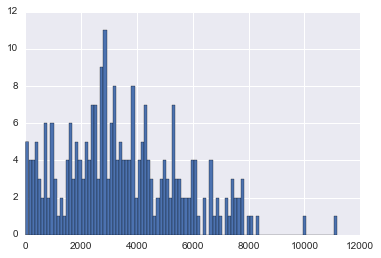

In [25]:
print('Towns with less than 1000 clients %i' %len(clients_per_states.loc[clients_per_states<1000]))
clients_per_states.hist(bins=100)

In [18]:
clients_per_state.hist()
print('Towns with less than 1000 clients %i' %len(clients_per_state.loc[clients_per_state<1000]))
clients_per_town.hist()
print('Towns with less than 1000 clients %i' %len(clients_per_town.loc[clients_per_town<1000]))

NameError: name 'clients_per_state' is not defined

In [ ]:
train_pivot_geo = pd.merge(train_pivot, train[['Cliente_ID', 'Agencia_ID']], how='left', 
                           left_on='Cliente_ID', right_on='Agencia_ID')
train_pivot_geo = pd.merge(train_pivot_geo, train[['Cliente_ID', 'Agencia_ID']], how='left', 
                           left_on='Cliente_ID', right_on='Agencia_ID')
train_pivot_geo.head()

# Usefull Kaggle forum posts

week 1, I'm delivering 100 bread X to store A. Record shows: 100 sold. week 2, I'm delivering another 150 bread X to store A, and I'm picking up 25 bread X from the ones that are unsold and expired. Record shows: 150 sold, 25 returned.<br><br>
So overall for week 1, net demand is 100-25=75.
<br><br>
Note: "sold" means "sold to the vendor", not "sold to customer"

I don't know if this is correct. Take a look at :

It seems that Dev proxima is the returns next week, and the adjusted demand is than just the delivered goods minus the returns next week. All this information is the observation of this week. 

In [ ]:
temp_client = train.loc[train['Cliente_ID']==333576,:]
temp_client_product = temp_client.loc[temp_client['Producto_ID']==1238,:]
temp_client_product

#### How often are there returns?

In three percent of the observations

In [ ]:
temp = train.loc[train['Dev_uni_proxima'] > 0,:]
len(temp)/len(train)

#### Important, what with missing weeks from a store

Example: store 15766 and product 1216

Your assumption is correct that Venta_uni_hoy and Dev_uni_proxima are both 0. The reason behind it is the demand isn't really tested because the supply=0 (Venta_uni_hoy=0), so there can be no returns. Therefore, the experiment there is missing. In that case, the demand is not 0, it's missing. In other cases where Venta_uni_hoy = Dev_uni_proxima != 0, the demand is 0.

In my own words, if the supply was zero, nothing is delivered to the store, so nothing can also be returned from the store. This means the adjusted demand is not really measured, and therefore missing. If 3 products were delivered on the other hand, and 3 products returned, it means the adjusted demand was zero.

Sometimes it happens that more products are returned than delivered, in that case the adjusted demand is not negative, but zero.

In [18]:
client_15766 = train.loc[(train['Cliente_ID']==15766) & (train['Producto_ID']==1216),:]
client_15766[['Semana', 'Venta_uni_hoy']].groupby('Semana').agg('sum')

,Venta_uni_hoy
Semana,
3,4
4,2
5,3
6,1
7,2
8,5


This is a bit confusing, as other products were delivered to the this particular client at week 9

In [17]:
client_15766 = train.loc[train['Cliente_ID']==15766,:]
client_15766[['Semana', 'Venta_uni_hoy']].groupby('Semana').agg('sum')

,Venta_uni_hoy
Semana,
3,131
4,130
5,134
6,91
7,150
8,121
9,129


### Split public and private leaderbord

Hi @Wendy,

Could you tell me how the test data subject to the Public LB and Private LB are split? are they split randomly or are they split based on the two different weeks (week 10 and week 11)?

Jianbo

@bobye, it's split by week.